In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy.stats import kde
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
from scipy import fftpack
import pylab as py

In [5]:
random.seed(1232324289)

In [17]:
def raytrace_3d(nrays, p, r, slit_width):
    
    u = np.zeros((nrays))
    v = np.zeros((nrays))
 
    for i in range(nrays):
        
        u[i] = (np.random.uniform(-2*np.pi,2*np.pi))
        v[i] = (np.random.uniform(-p*np.pi/12,p*np.pi/12))

    x = r * np.cos(u) * np.sin(v)
    y = r * np.sin(u) * np.sin(v)
    z = r * np.ones(np.size(u)) * np.cos(v)
    z = z/z

    """path = np.zeros((nrays))
    
    for i in range(nrays):
        
        path[i] = r * (np.sqrt(1 + u[i]**2 + v[i]**2))"""
        
    x_flat = x.flatten()
    y_flat = y.flatten()
    
    #For a slit test
    
    #a = -(slit_width / 2)
    #b = (slit_width / 2)
    
    indices = np.where(((x_flat >= -0.01001) & (x_flat <= -0.01)) | ((x_flat >= 0.01)&(x_flat <= 0.01001)))
    
    x_slit = x_flat[indices]
    y_slit = y_flat[indices]
    
    u1 = np.zeros((x_slit.size))
    v1 = np.zeros((x_slit.size))
    
    for i in range(x_slit.size):
        
        u1[i] = (np.random.uniform(-2*np.pi,2*np.pi))
        v1[i] = (np.random.uniform(-p*np.pi,p*np.pi))

    x1 = r * np.cos(u1) * np.sin(v1) + x_slit
    y1 = r * np.sin(u1) * np.sin(v1) + y_slit
    z1 = r * np.ones(np.size(u1)) * np.cos(v1)
    z1 = z1/z1 
           
    x1_flat = x1.flatten()
    y1_flat = y1.flatten()
    
    #another possibility for distance calculation
    
    #x_sub = x1_flat - x_flat
    #y_sub = y1_flat - y_flat
    
    #slit case
    
    x_sub = x1_flat - x_slit
    y_sub = y1_flat - y_slit
    
    #thetax = np.zeros(nrays**2)
    #thetay = np.zeros(nrays**2)
    #path = np.zeros(nrays**2)

    #for i in range(nrays**2):
        
        #thetax[i] = np.arcsin((x_sub[i]))
        #thetay[i] = np.arcsin((y_sub[i]))
        
        #path[i] = r * (np.sqrt(1 +thetax[i]**2 + thetay[i]**2))
        
    #slit case
    
    thetax = np.zeros(x_slit.size)
    thetay = np.zeros(x_slit.size)
    path = np.zeros(x_slit.size)
    
    for i in range(x_slit.size):
        
        thetax[i] = np.arcsin((x_sub[i]))
        thetay[i] = np.arcsin((y_sub[i]))
        
        path[i] = r * (np.sqrt(1 + thetax[i]**2 + thetay[i]**2))
    
    
    #Observer View
        
    indices = np.where(x1_flat**2 + y1_flat**2 <= (0.04)**2)

    x_obs = x1_flat[indices]
    y_obs = y1_flat[indices]
    
    return x, y, z, x1, y1, z1, x_obs, y_obs, x_flat, y_flat, x_slit, y_slit


In [18]:
def capRatio(r, a, h):
    #cap to sphere ratio
    surface_cap = np.pi * (a**2 + h**2)
    surface_sphere = 4.0 * np.pi * r**2
    cap_div_by_sphere = (surface_cap)/(surface_sphere)
    return cap_div_by_sphere

def findRadius(a, h):
    #find radius if you have cap base radius a and height
    r = (a**2 + h**2) / (2*h)
    return r

In [8]:
def makeDyn(nx, ny, phi, omega, tau, nrays, x_slit):

    # make 1-D arrays that store the index values of each point.
    t = np.linspace(0,3600,nx)
    v = np.linspace(800000000,870000000,ny)

    # making empty arrays to store the 2-D indices
    tt = np.zeros((nx,ny))
    vv = np.zeros((nx,ny))

    for row in range(nx):
        for col in range(ny):
            tt[row][col] = t[col]
            vv[row][col] = v[row]

    efield = np.zeros((nx,ny))
    
    for i in range(x_slit.size):
    
        c = (np.cos(np.pi*((omega[i]*tt) + (tau[i]*vv))))
        efield = efield + c
        #efield = efield**2

    return efield

In [9]:
def makeSec(nxx, nyy, efield, nrays, omega, tau):
        
    """sec_1 = np.fft.fft2(efield)
    sec_2 = np.fft.fftshift(sec_1)
    sec = np.log10(np.abs(sec_2)**2)"""
    
    sec = (np.fft.fft2((efield)-np.mean(efield)))
    #sec = (np.fft.fftn((efield)-np.mean(efield)))
    sec = np.absolute(np.fft.fftshift(sec))
    sec = np.abs(np.log(sec))
    #sec = np.sqrt(sec)
    #sec = 10*np.log10(sec/np.max(sec))
    
    return sec

/Users/jakobtfaber/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/Users/jakobtfaber/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/Users/jakobtfaber/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/Users/jakobtfaber/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/Users/jakobtfaber/anaconda3/lib/python3.6/site-

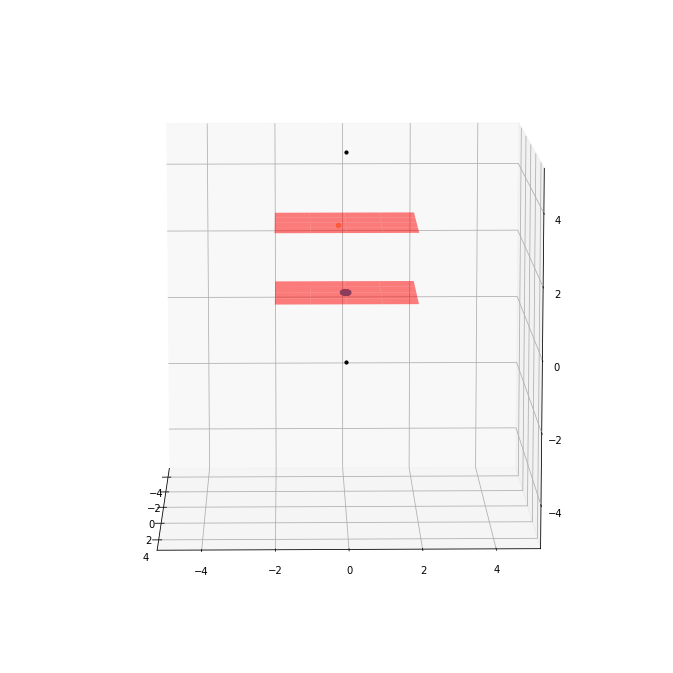

In [10]:
def main():
    
    random.seed(223636423)
    
    #choose a and h
    # a = radius of base of cap
    a = 1
    # h = height of cap
    h = 0.75
    r = findRadius(a,h)
    p = capRatio(r, a, h) # Ratio of sphere to be plotted, could also be a function of a.
    
    slit_width = 0.01
    
    nrays = 100
    
    cap_div_by_sphere = capRatio(r, a, h)
    r = findRadius(a, h)

    #Send out spherical waves from a point source in the form of rays.
    
    x, y, z, x1, y1, z1, x_obs, y_obs, x_flat, y_flat, x_slit, y_slit = raytrace_3d(nrays, p, r, slit_width)
    
    fig = plt.figure(figsize = (24,12))

    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim3d(-5,5)
    ax.set_ylim3d(-5,5)
    ax.set_zlim3d(-5,5)
    ax.scatter(x, y, z, cmap= 'autumn', alpha = 0.5)
    plt.gca().set_aspect('equal')

    ax = plt.gca()
    ax.hold(True)

    xx, yy = np.meshgrid(range(5), range(5))
    zz = xx*0 + 1
    xx = xx - 2
    yy = yy - 2

    # plot the surface
    ax.plot_surface(xx, yy, zz, cmap = 'autumn', alpha = 0.5)
    
    ax = plt.gca()
    ax.hold(True)
    
    xx, yy = np.meshgrid(range(5), range(5))
    zz = xx*0 + 3
    xx = xx - 2
    yy = yy - 2

    # plot the surface
    ax.plot_surface(xx, yy, zz, cmap = 'autumn', alpha = 0.5)
    
    ax = plt.gca()
    ax.hold(True)
    
    ax.scatter(0,0,-1, c = 'black', s = 10)

    for angle in range(0, 360):
        ax.view_init(10, angle)
        
    ax = plt.gca()
    ax.hold(True)
    
    z1_secondplane = z1 + 2
    
    ax.scatter(x1,y1,z1_secondplane, cmap = 'autumn', alpha = 0.5)
    
    ax = plt.gca()
    ax.hold(True)
    
    ax.scatter(0,0,5, c = 'black', s = 10)

    plt.show()
    
main()
    
        

(196,)
(4,)


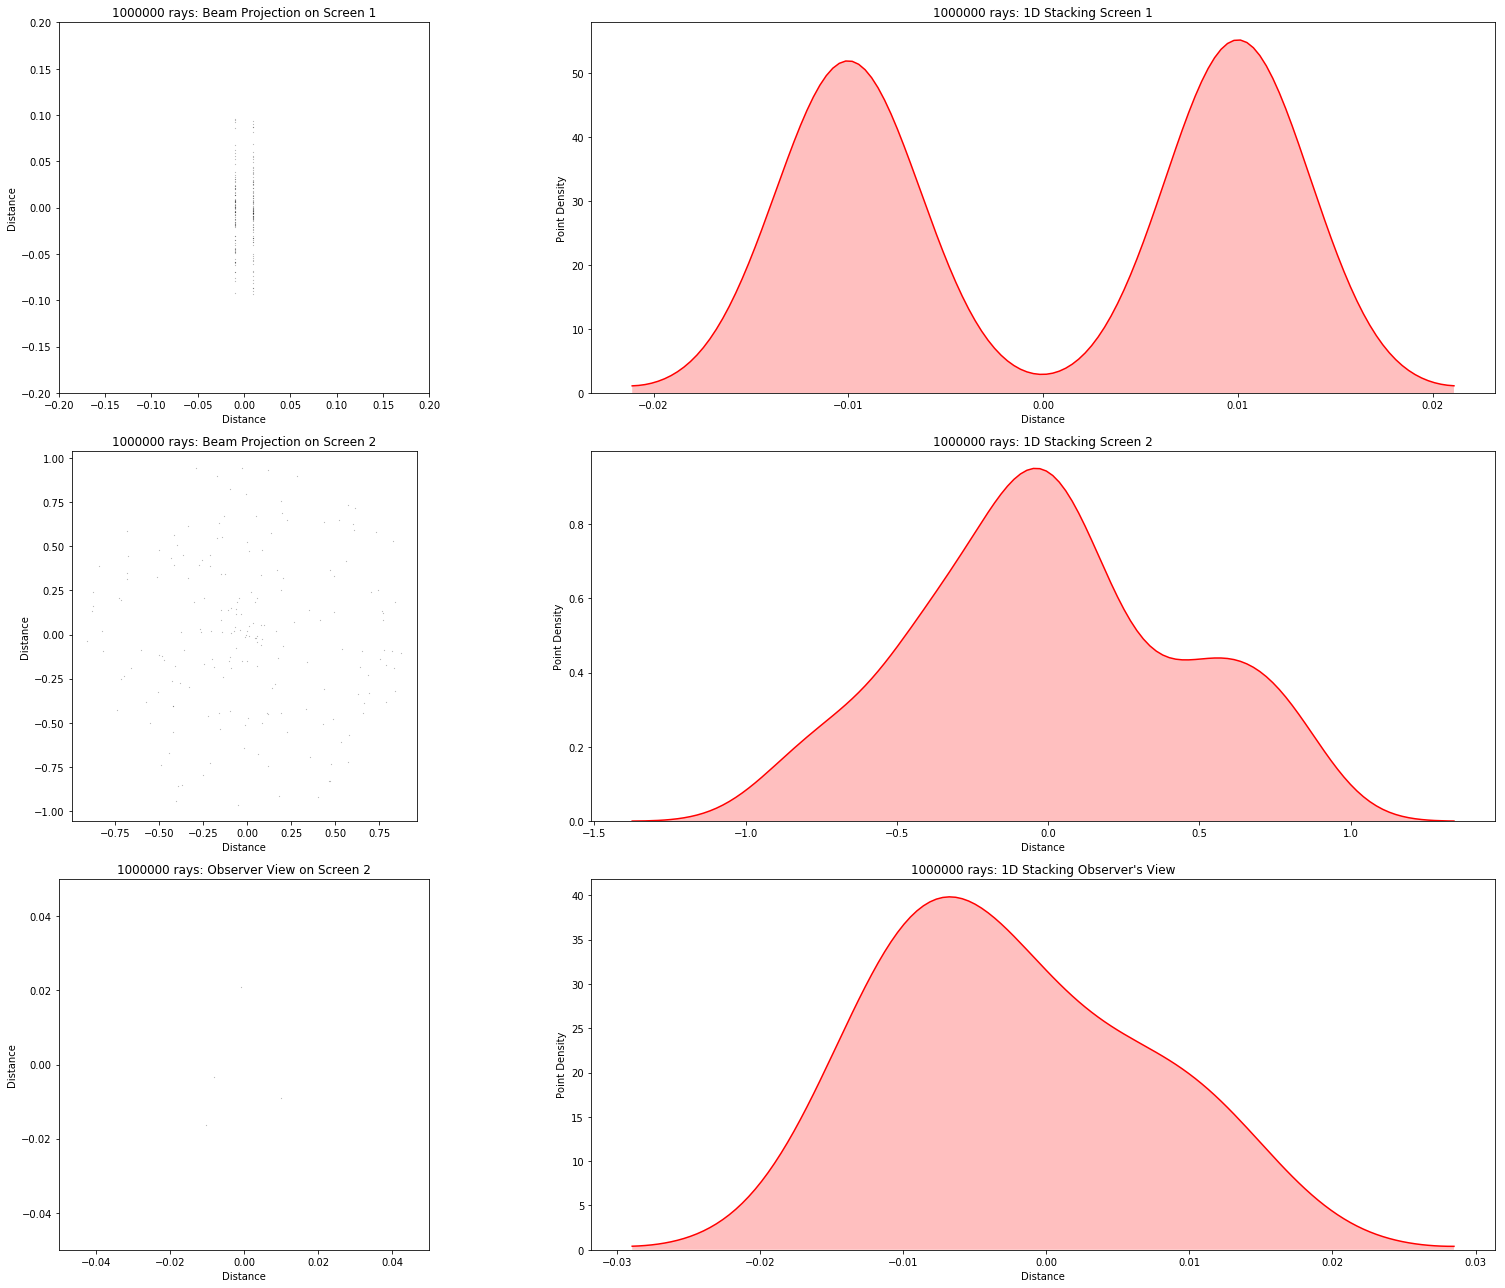

In [19]:
def main2():
    
    random.seed(223636423)
    
    #choose a and h
    # a = radius of base of cap
    a = 1
    # h = height of cap
    h = 0.75
    r = findRadius(a,h)
    p = capRatio(r, a, h) # Ratio of sphere to be plotted, could also be a function of a.
    nrays = 1000000
    
    slit_width = 0.0001
    
    cap_div_by_sphere = capRatio(r, a, h)
    r = findRadius(a, h)

    #Send out spherical waves from a point source in the form of rays.
    
    x, y, z, x1, y1, z1, x_obs, y_obs, x_flat, y_flat, x_slit, y_slit = raytrace_3d(nrays, p, r, slit_width)
    
    print(x_slit.shape)
    
    print(x_obs.shape)
    
    fig = plt.figure(figsize = (24,18))
    ax2 = fig.add_subplot(321)
    ax2.set_title(str(nrays) + " rays: Beam Projection on Screen 1")
    ax2.set_xlabel("Distance")
    ax2.set_ylabel("Distance")
    plt.xlim(-0.2,0.2)
    plt.ylim(-0.2,0.2)
    plt.scatter(x_slit,y_slit, c = 'black', marker = 'o', s = 0.01)
    plt.gca().set_aspect('equal')
    
    x_slit_1d = x_slit.flatten()
    y_slit_1d = y_slit.flatten()
        
    ax3 = fig.add_subplot(322)
    ax3.set_title(str(nrays) + " rays: 1D Stacking Screen 1")
    ax3.set_xlabel("Distance")
    ax3.set_ylabel("Point Density")
    sns.kdeplot(x_slit_1d, shade=True, color = "r")
    
    ax4 = fig.add_subplot(323)
    ax4.set_title(str(nrays) + " rays: Beam Projection on Screen 2")
    ax4.set_xlabel("Distance")
    ax4.set_ylabel("Distance")
    plt.scatter(x1,y1, c = 'black', marker = 'o', s = 0.01)
    plt.gca().set_aspect('equal')
    
    y1_1d = y1.flatten()
    x1_1d = x1.flatten()
    
    ax5 = fig.add_subplot(324)
    ax5.set_title(str(nrays) + " rays: 1D Stacking Screen 2")
    ax5.set_xlabel("Distance")
    ax5.set_ylabel("Point Density")
    sns.kdeplot(x1_1d, shade=True, color = "r")
    
    ax6 = fig.add_subplot(325)
    ax6.set_title(str(nrays) + " rays: Observer View on Screen 2")
    ax6.set_xlabel("Distance")
    ax6.set_ylabel("Distance")
    ax6.set_xlim(-0.05,0.05)
    ax6.set_ylim(-0.05,0.05)
    plt.scatter(x_obs,y_obs, c = 'black', marker = 'o', s = 0.01)
    plt.gca().set_aspect('equal')
    
    y_obs_1d = y_obs.flatten()
    x_obs_1d = x_obs.flatten()
    
    ax7 = fig.add_subplot(326)
    ax7.set_title(str(nrays) + " rays: 1D Stacking Observer's View")
    ax7.set_xlabel("Distance")
    ax7.set_ylabel("Point Density")
    sns.kdeplot(x_obs_1d, shade=True, color = "r")
   
    plt.tight_layout()
    plt.show()
    
main2()

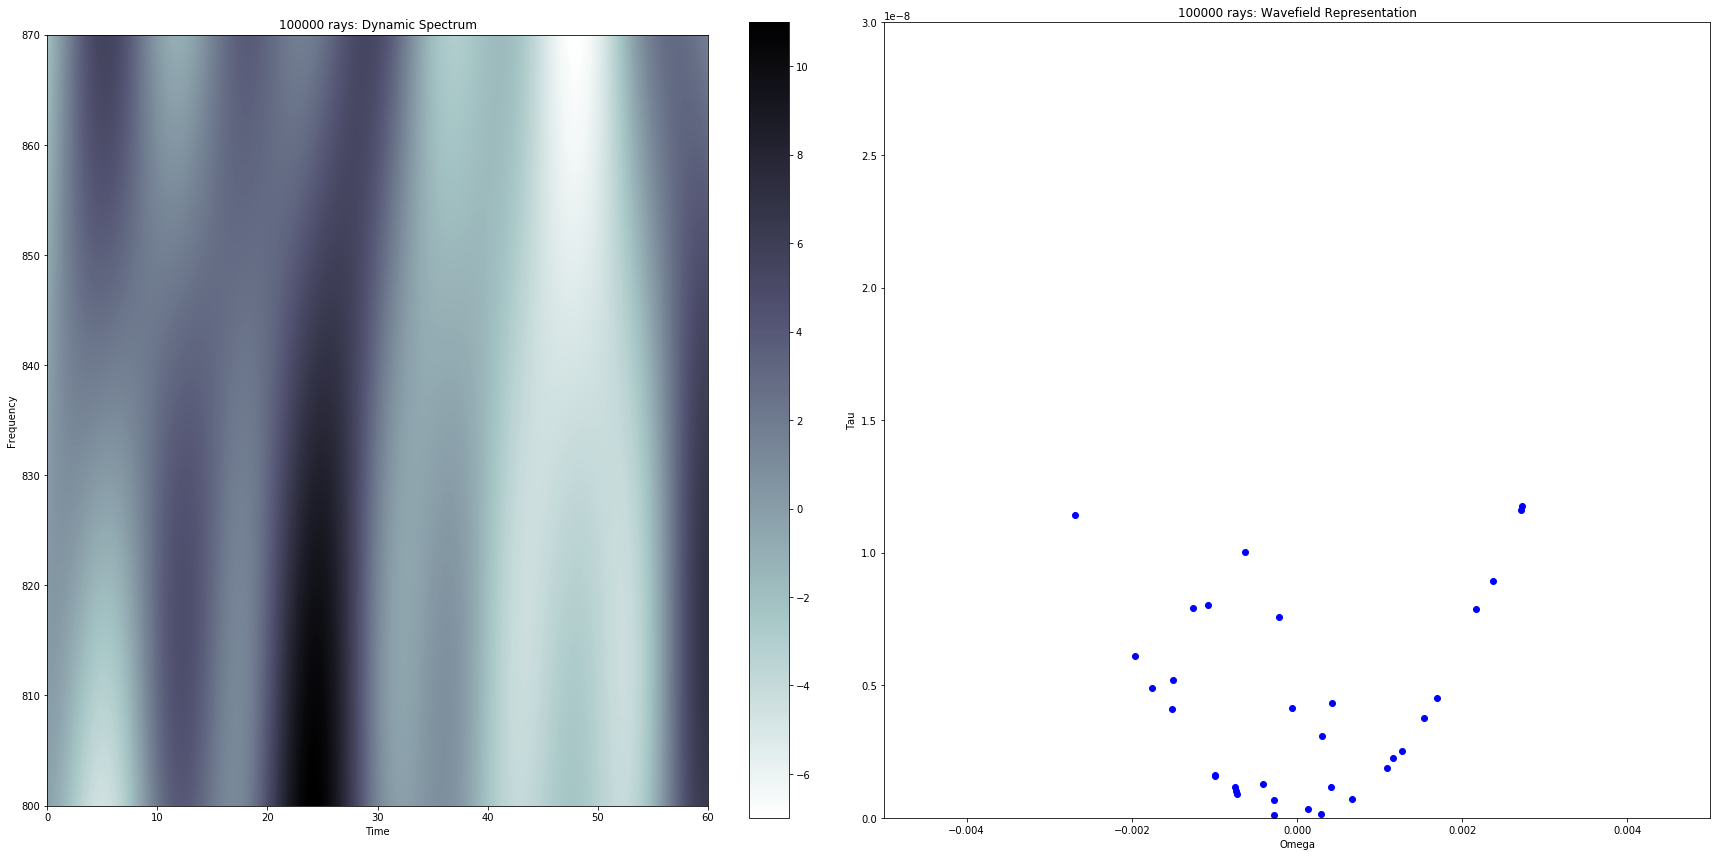

In [81]:
def main3():
    
    random.seed(223636423)
    
    #choose a and h
    # a = radius of base of cap
    a = 1
    # h = height of cap
    h = 0.75
    r = findRadius(a,h)
    p = capRatio(r, a, h) # Ratio of sphere to be plotted, could also be a function of a.
    
    nrays = 100000
    
    cap_div_by_sphere = capRatio(r, a, h)
    r = findRadius(a, h)

    #Send out spherical waves from a point source in the form of rays.
    
    slit_width = 1
    
    x, y, z, x1, y1, z1, x_obs, y_obs, x_flat, y_flat, x_slit, y_slit = raytrace_3d(nrays, p, r, slit_width)
    
    
    #x_flat = x.flatten()
    #y_flat = y.flatten()
    
    #Now cut out a circle of set radius that represents what is within the observer's line of sight.
    
    x1_flat = x1.flatten()
    y1_flat = y1.flatten()
    
    #indices = np.where(x_flat**2 + y_flat**2 <= (0.04)**2)
    #x_obs = x1_flat[indices]
    #y_obs = y1_flat[indices]
    
    #Calculate thetax and thetay
    
    #x_sub = x1_flat - x_flat
    #y_sub = y1_flat - y_flat
    x_sub = x1_flat - x_slit
    y_sub = y1_flat - y_slit
    
    thetax = np.zeros(x_slit.size)
    thetay = np.zeros(x_slit.size)

    for i in range(x_slit.size):
        
        thetax[i] = (np.arcsin(x_sub[i]))/(r)
        thetay[i] = (np.arcsin(y_sub[i]))/(r)
        #thetax[i] = (np.arcsin(x_slit[i]))/(r)
        #thetay[i] = (np.arcsin(y_slit[i]))/(r)
        
    #Calculate omega
    
    vel = 20000
    lamda = 0.5 #meters
    
    omega = np.zeros(x_slit.size)
    
    for i in range(x_slit.size):
        
        omega[i] = ((2*np.pi*((thetax[i]))*vel)/(lamda*1e8))
    
    omega[np.isnan(omega)] = 0
    
    #Calculate tau
    
    dz = 1

    tau = np.zeros(x_slit.size)
    
    for i in range(x_slit.size):
        
        x_delay = ((thetax[i]**2 * dz)/(1e8))
        y_delay = ((thetay[i]**2 * dz)/(1e8))
        tau[i] = np.sqrt(x_delay**2 + y_delay**2)
        
    tau[np.isnan(tau)] = 0

        
    #Make Dynamic Spectrum
    
    phi = 2.0 * np.pi * np.random.rand(nrays) # random phase
    nx = 1024
    ny = 1024
    efield = makeDyn(nx, ny, phi, omega, tau, nrays, x_slit)
    
    fig = plt.figure(figsize = (24,12))
    ax1 = fig.add_subplot(121)
    ax1.set_title(str(nrays) + " rays: Dynamic Spectrum")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Frequency")
    dynplt = plt.imshow(efield, extent=[0,60,800,870], aspect='auto', cmap='bone_r')
    plt.colorbar(dynplt, ax = ax1)
    plt.gca().set_aspect('equal')
    
    """sec_amp = np.zeros((nrays**2))
    
    for i in range(nrays**2):
        sec_amp = ((100 * np.random.rand())*omega[i], (100 * np.random.rand())*tau[i])
    
    amp = np.zeros(nrays**2)
    
    for i in range(nrays**2):
        amp[i] = 100 * np.random.rand()"""
    
    #Make Secondary Spectrum
    
    nxx = 1024
    nyy = 1024
    sec = makeSec(nxx, nyy, efield, nrays, omega, tau)
    #sec = np.array(sec, dtype = 'float64')
    
    
    #print(sec)

    
    #sec_hist, xlim, ylim = np.histogram2d(omega, tau, bins = 500, weights = amp)
    
    ax2 = fig.add_subplot(122)
    ax2.set_title(str(nrays) + " rays: Wavefield Representation")
    ax2.set_xlabel("Omega")
    ax2.set_ylabel("Tau")
    ax2.set_xlim(-0.005, 0.005)
    ax2.set_ylim(0, 0.00000003)
    plt.scatter(omega, tau, c = 'b', marker = 'o')
    #plt.colorbar(secplt, ax = ax2)
    
    #ax3 = fig.add_subplot(133)
    #ax3.set_title(str(nrays) + " rays: Secondary Spectrum")
    #ax3.set_xlabel("Omega")
    #ax3.set_ylabel("Tau")
    #ax3.set_xlim(-10, 10)
    #ax3.set_ylim(0, 10)
    #plt.imshow(sec, extent = [-0.05, 0.05, -0.05, 0.05], aspect = 'auto', cmap = 'bone_r')
    #plt.gca().set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
main3()